## Employee Attrition Prediction From Data to Decision Making
This project aims to predict employee attrition using machine learning models and provide actionable insights to improve retention strategies. By leveraging the IBM HR Analytics Dataset, we build classification models such as Random Forest and Logistic Regression, interpret their predictions using SHAP (SHapley Additive exPlanations), and derive key factors influencing employee turnover.

# Step 1: Perform Exploratory Data Analysis (EDA)
Objective:
Identify key factors influencing employee attrition by analyzing the dataset.

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Read#Read and understand Data
df = pd.read_csv('C:/Users/ashfa/Downloads/HR-Employee-Attrition.csv')


In [12]:
# Display basic information about the dataset
print("Dataset Preview:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Preview:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOpti

In [14]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        6

In [16]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [18]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


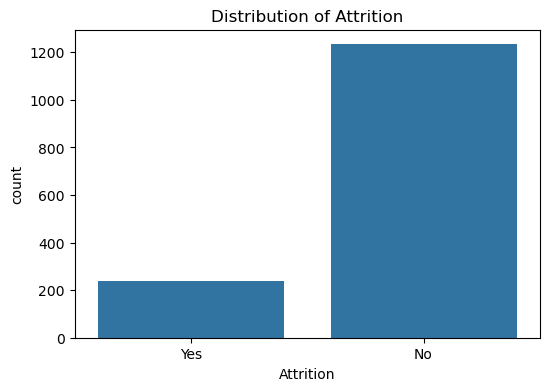

In [20]:
# Distribution of target variable (Attrition)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition')
plt.title("Distribution of Attrition")
plt.show()

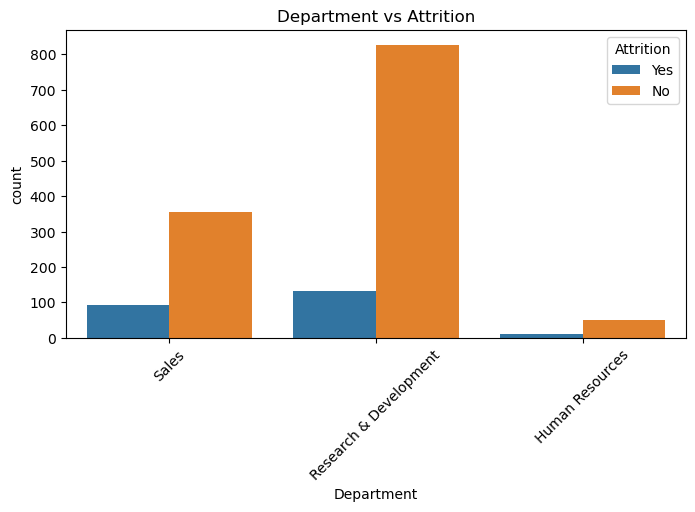

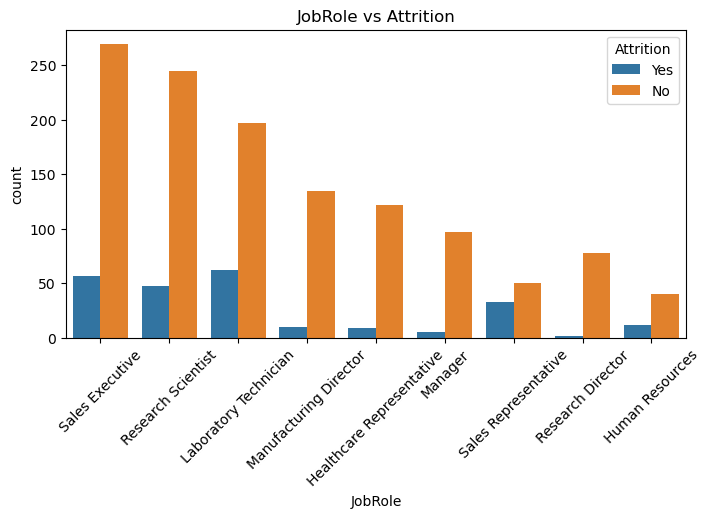

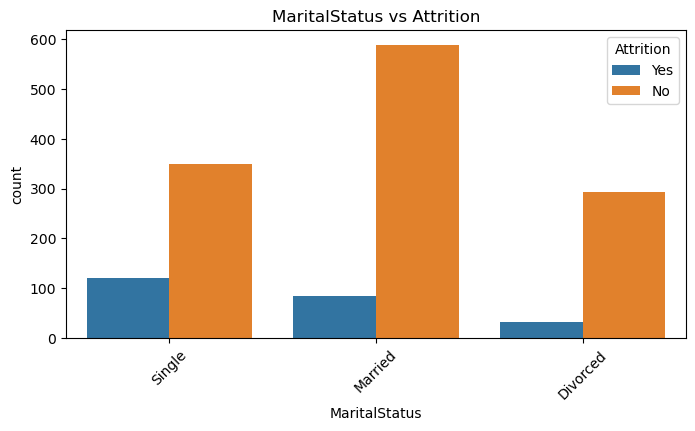

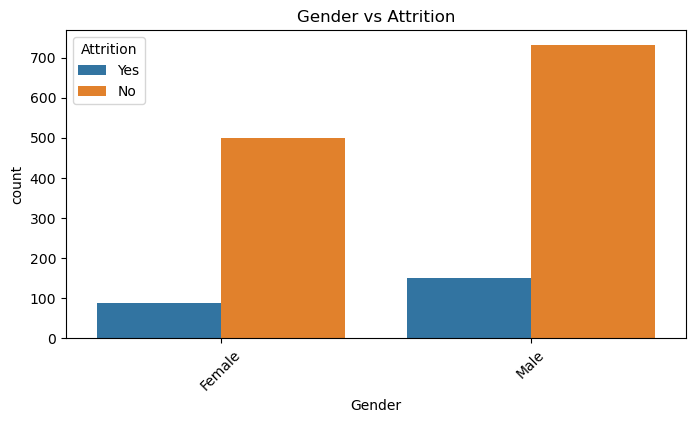

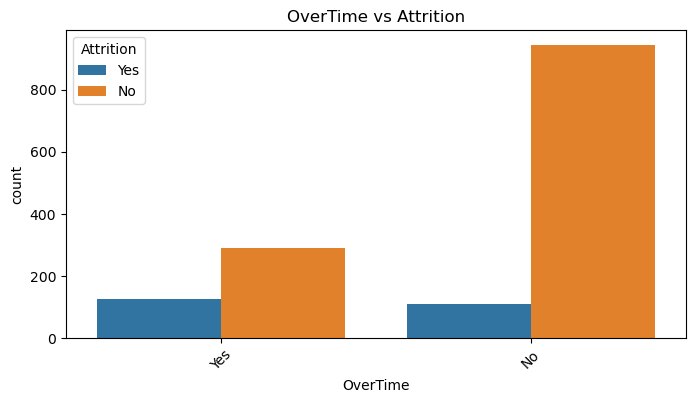

In [22]:
# Key factors influencing attrition
# Analyze categorical features
categorical_features = ['Department', 'JobRole', 'MaritalStatus', 'Gender', 'OverTime']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue='Attrition')
    plt.title(f"{feature} vs Attrition")
    plt.xticks(rotation=45)
    plt.show()


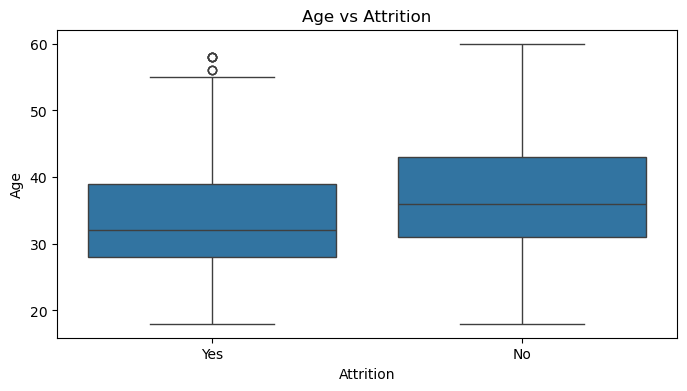

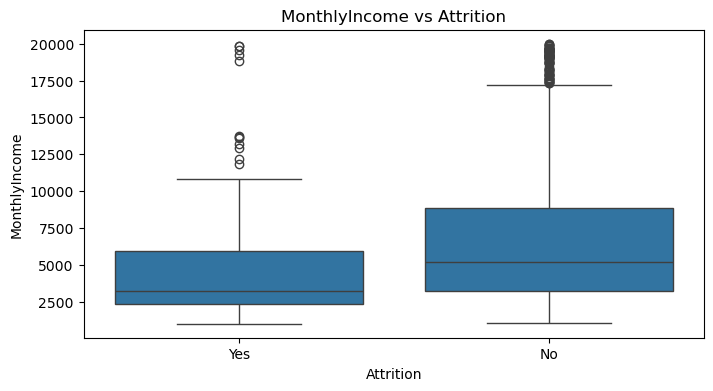

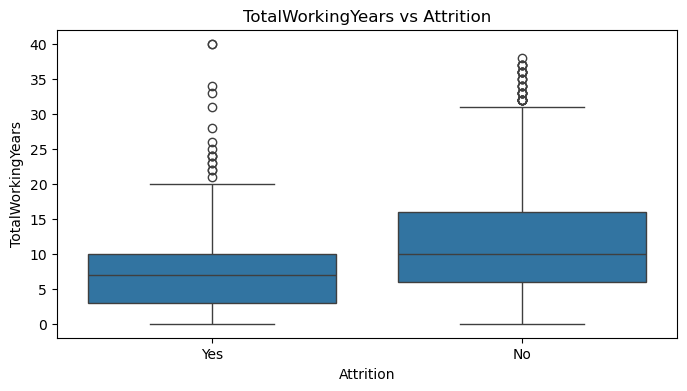

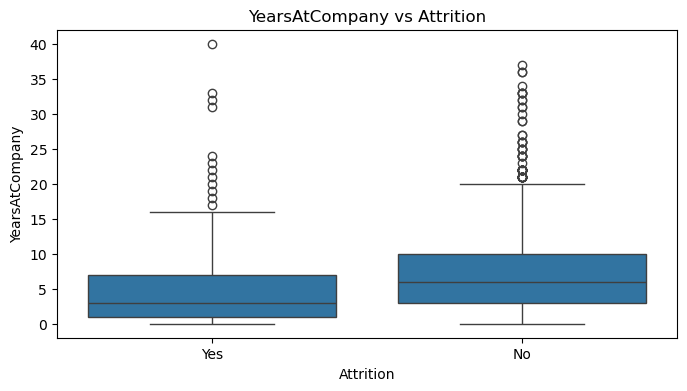

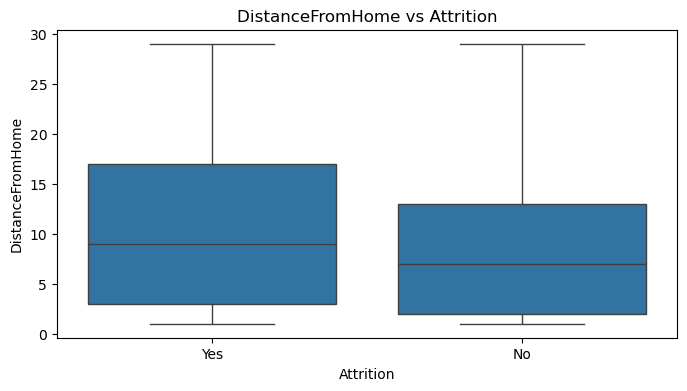

In [24]:
# Analyze numerical features
numerical_features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Attrition', y=feature)
    plt.title(f"{feature} vs Attrition")
    plt.show()

### **Key Insights from EDA**

- **Attrition Rate:**  
  The dataset might have an imbalance between employees who left (`Yes`) and those who stayed (`No`).

- **Categorical Features:**  
  Certain departments, job roles, marital statuses, and overtime patterns may correlate strongly with attrition. For example:
  - Employees in specific departments (e.g., Sales, Research & Development) may show higher attrition rates.
  - Employees working overtime frequently are more likely to leave.

- **Numerical Features:**  
  Employees with the following characteristics may be more likely to leave:
  - **Lower income:** Employees with lower monthly salaries tend to have higher attrition risk.
  - **Shorter tenure:** Employees with fewer years at the company are more likely to leave.
  - **Longer commutes:** Employees living farther from the workplace may exhibit higher attrition rates.

## Step 2: Train Classification Models
- **Objective:**  
Train classification models such as Random Forest and Logistic Regression to predict employee attrition.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [31]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [33]:
# Separate features (X) and target (y)
X = df.drop('Attrition', axis=1).values
y = df['Attrition'].values

In [35]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Train Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")


Random Forest Performance:
Accuracy: 0.83
Precision: 0.38
Recall: 0.11
F1-Score: 0.17
Confusion Matrix:
[[239   8]
 [ 42   5]]

Logistic Regression Performance:
Accuracy: 0.87
Precision: 0.69
Recall: 0.38
F1-Score: 0.49
Confusion Matrix:
[[239   8]
 [ 29  18]]


## Step 3: Use SHAP or LIME to Explain Model Predictions
- **Objective:** 
Interpret model predictions using SHAP or LIME to derive actionable insights.

In [48]:
# Check the shape of SHAP values
print("Shape of shap_values:", np.array(shap_values).shape)

# Check the shape of X_test
print("Shape of X_test:", X_test.shape)

Shape of shap_values: (294, 34, 2)
Shape of X_test: (294, 34)


In [50]:
# Extract SHAP values for class 1 (positive class)
shap_values_positive = shap_values[:, :, 1]

# Verify the shape of the extracted SHAP values
print("Shape of shap_values_positive:", shap_values_positive.shape)

Shape of shap_values_positive: (294, 34)


In [52]:
# Get feature names after preprocessing
feature_names = df.drop('Attrition', axis=1).columns

# Verify the number of feature names
print("Number of feature names:", len(feature_names))

# Ensure the number of feature names matches the number of features in X_test
assert len(feature_names) == X_test.shape[1], "Mismatch between feature names and X_test!"

Number of feature names: 34


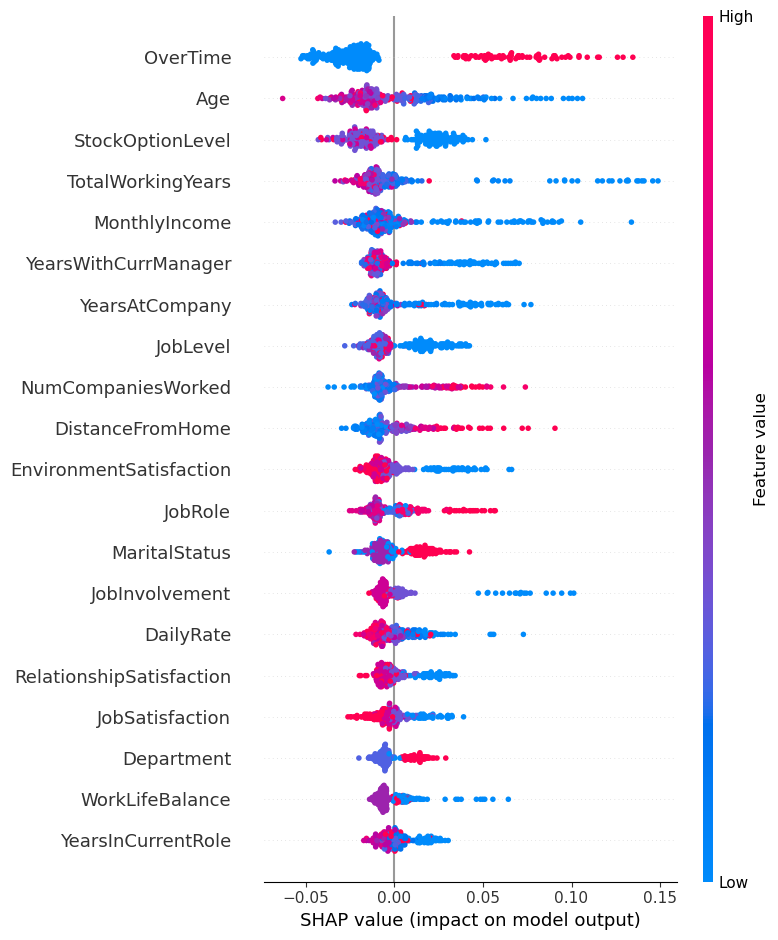

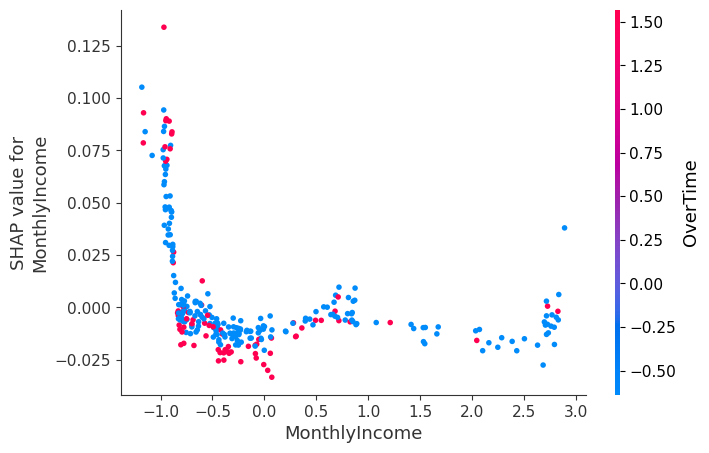

In [54]:
import matplotlib.pyplot as plt

# Plot summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_positive, X_test, feature_names=feature_names)
plt.show()

# Plot dependence plot for a specific feature (e.g., MonthlyIncome)
shap.dependence_plot(
    'MonthlyIncome', 
    shap_values_positive, 
    X_test, 
    feature_names=feature_names
)
plt.show()

### **Key Insights from SHAP**

- Features like **`MonthlyIncome`**, **`OverTime`**, and **`YearsAtCompany`** may have the highest impact on attrition.
- Lower income, longer working hours, and shorter tenure at the company are associated with higher attrition risk.

---

### **Step 4: Provide Actionable Insights**

#### **Insights Derived from the Analysis:**

1. **Salary Adjustments:**  
   Employees with lower monthly incomes are more likely to leave. Consider revising compensation packages or offering performance-based bonuses.

2. **Work-Life Balance:**  
   Employees who work overtime frequently are at higher risk of leaving. Encourage better work-life balance and flexible work arrangements.

3. **Career Growth Opportunities:**  
   Employees with fewer years at the company are more likely to leave. Provide clear career progression paths and mentorship programs.

4. **Department-Specific Strategies:**  
   Certain departments (e.g., Sales, Research & Development) may have higher attrition rates. Investigate department-specific issues and address them.

5. **Retention Programs:**  
   Focus on retaining employees in their first few years by improving onboarding processes and engagement activities.

---

### **Outcome**

- A classification model (e.g., Random Forest) that predicts employee attrition with high accuracy and interpretability.
- Actionable insights derived from SHAP/LIME analysis to reduce attrition and improve retention strategies.

---

### **Final Notes**

- Use techniques like **SMOTE** if the dataset is imbalanced to improve model performance.
- Regularly monitor model performance and update it with new data to ensure accuracy.
- Share the insights with HR teams to implement targeted retention strategies.